In [1]:
# installing package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from numpy import random
from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
# importing data

# data import -- google colab
#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv'
#df = pd.read_csv(file_path)
# data import -- jupyter notebook
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df = df.rename(columns={'family_history_with_overweight': 'FHWO', 'NObeyesdad' : 'Obesity Level',})
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
for i in cat_cols:
    col_val = sorted(list(set(df[i].tolist())))
    replace_num = []
    for j in range(len(col_val)):
        replace_num.append(j)
    df[i].replace(col_val,replace_num, inplace=True)
outlier_index = [18, 21, 25, 30, 68, 92, 119, 132, 133, 142, 152, 188, 191, 200, 217, 232, 236, 245, 252, 277, 333, 495]
df_remove_outliers = df
df = df.drop(outlier_index)
df = df.reset_index(drop=True)
features = ['Age', 'Gender', 'FHWO', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])

target_name = 'Obesity Level'
y = df[target_name]
columns = ['Height', 'Weight']
df.drop(columns, inplace=True, axis=1)

In [4]:
from pycaret.datasets import get_data

from pycaret.classification import *
s = setup(data = df, target = 'Obesity Level', session_id = 123)


,Description,Value
0,Session id,123
1,Target,Obesity Level
2,Target type,Multiclass
3,Original data shape,"(2089, 15)"
4,Transformed data shape,"(2089, 15)"
5,Transformed train set shape,"(1462, 15)"
6,Transformed test set shape,"(627, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Gender,Age,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity Level
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2085,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2086,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2087,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [15]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8400,0.9740,0.8400,0.8492,0.8399,0.8131,0.8146,0.0880
lightgbm,Light Gradient Boosting Machine,0.8352,0.9713,0.8352,0.8447,0.8352,0.8075,0.8089,3.9570
et,Extra Trees Classifier,0.8311,0.9726,0.8311,0.8355,0.8295,0.8026,0.8038,0.0840
gbc,Gradient Boosting Classifier,0.7907,0.9590,0.7907,0.7969,0.7877,0.7555,0.7575,0.3740
dt,Decision Tree Classifier,0.7353,0.8459,0.7353,0.7387,0.7337,0.6908,0.6920,0.0170
knn,K Neighbors Classifier,0.7148,0.9202,0.7148,0.7147,0.6892,0.6662,0.6732,0.0230
lr,Logistic Regression,0.5787,0.8703,0.5787,0.5697,0.5558,0.5068,0.5127,1.0630
lda,Linear Discriminant Analysis,0.5657,0.8649,0.5657,0.5480,0.5333,0.4913,0.4983,0.0140
ridge,Ridge Classifier,0.5383,0.0000,0.5383,0.5362,0.4894,0.4587,0.4715,0.0110
nb,Naive Bayes,0.4385,0.8313,0.4385,0.4558,0.3517,0.3461,0.3838,0.0150


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

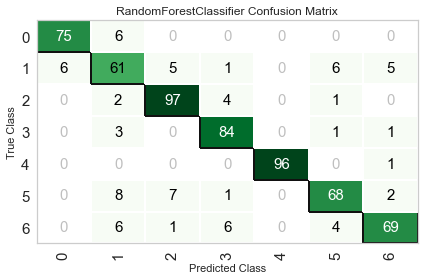

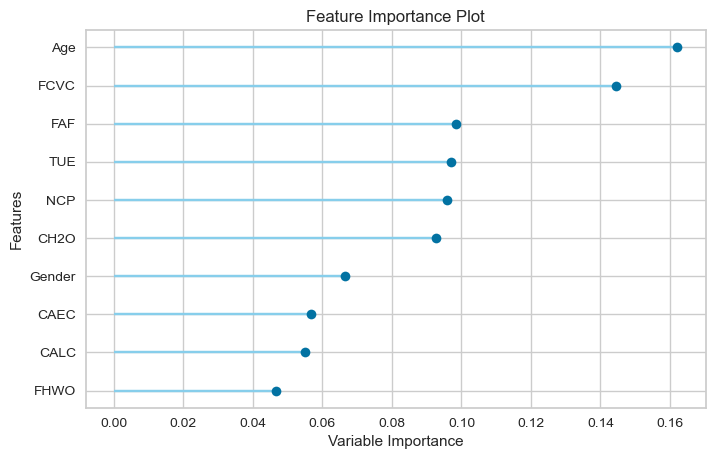

In [7]:
plot_model(best, plot = 'confusion_matrix')
plot_model(best, plot = 'feature')

In [13]:
pred = predict_model(best)
new_df = df.copy()
new_df.drop('Obesity Level', axis=1, inplace=True)
save_model(best, 'pipeline')
loaded_best_pipeline = load_model('pipeline')
loaded_best_pipeline

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8772,0.9844,0.8772,0.8777,0.8767,0.8565,0.8568


,Gender,Age,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [17]:
best_acc_models_top3 = compare_models(sort = 'Accuracy', n_select = 3)
best_acc_models_top3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8400,0.9740,0.8400,0.8492,0.8399,0.8131,0.8146,0.0900
lightgbm,Light Gradient Boosting Machine,0.8352,0.9713,0.8352,0.8447,0.8352,0.8075,0.8089,3.7090
et,Extra Trees Classifier,0.8311,0.9726,0.8311,0.8355,0.8295,0.8026,0.8038,0.0720
gbc,Gradient Boosting Classifier,0.7907,0.9590,0.7907,0.7969,0.7877,0.7555,0.7575,0.3730
dt,Decision Tree Classifier,0.7353,0.8459,0.7353,0.7387,0.7337,0.6908,0.6920,0.0120
knn,K Neighbors Classifier,0.7148,0.9202,0.7148,0.7147,0.6892,0.6662,0.6732,0.0190
lr,Logistic Regression,0.5787,0.8703,0.5787,0.5697,0.5558,0.5068,0.5127,0.1190
lda,Linear Discriminant Analysis,0.5657,0.8649,0.5657,0.5480,0.5333,0.4913,0.4983,0.0120
ridge,Ridge Classifier,0.5383,0.0000,0.5383,0.5362,0.4894,0.4587,0.4715,0.0090
nb,Naive Bayes,0.4385,0.8313,0.4385,0.4558,0.3517,0.3461,0.3838,0.0120


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=123, verbose=0, warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 ExtraTreesClassifier(bootstrap=False, ccp_a